In [12]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# read the data
df = pd.read_csv("/Users/mustainbillah/MBillah/AI,ML,DL/code/AAAMLP-Abhishek_Thakur/dataset/cat-in-the-dat-ii/train.csv")

In [14]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


(array([487677.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 112323.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

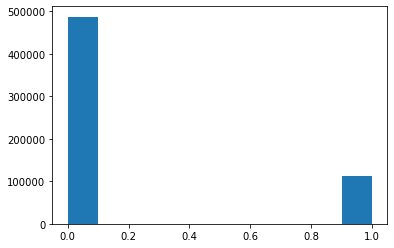

In [15]:
plt.hist(df['target'])

In [16]:
df.ord_2.unique()

array(['Hot', 'Warm', 'Freezing', 'Lava Hot', 'Cold', 'Boiling Hot', nan],
      dtype=object)

In [17]:
mapping = {
    "Freezing": 0,
    "Warm": 1,
    "Cold": 2,
    "Boiling Hot": 3,
    "Hot": 4,
    "Lava Hot": 5
}

In [18]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [10]:
# mapping the values with numbers
# df.loc[:, 'ord_2'] = df.ord_2.map(mapping)

In [20]:
df.ord_2.fillna("NONE").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

* when test set have unknown/rare categories that time we have combine the train and test set
* or find out the rare categories in test dataset
* simple concatenation of training and test sets to learn about the categories present in the test set but not in the training set or rare categories in the training set


In [22]:
import pandas as pd
from sklearn import preprocessing

# read the data
train = pd.read_csv("/Users/mustainbillah/MBillah/AI,ML,DL/code/AAAMLP-Abhishek_Thakur/dataset/cat-in-the-dat-ii/train.csv")
test = pd.read_csv("/Users/mustainbillah/MBillah/AI,ML,DL/code/AAAMLP-Abhishek_Thakur/dataset/cat-in-the-dat-ii/test.csv")

In [23]:
# Create a fake target column for test data
# Since this column doesn't exist
test.loc[:, 'target'] = -1

In [24]:
# Concatenate both training and test data
data = pd.concat([train, test]).reset_index(drop=True)

In [25]:
# Make a list of features we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x not in ['id', 'target']]

In [26]:
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()
    # since its categorical data, we fillna with string and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical
    temp_col = data[feat].fillna("NONE").astype(str).values
    # we can use fit_transform here as we do not have any extra test data that we need to transform sseparately.
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)

In [27]:
# Split the train and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

In [28]:
df.ord_2.fillna("NONE").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

In [29]:
df.ord_4.fillna("NONE").value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

In [31]:
# those values are less than 2000 times we can call them rare category
df.ord_4 = df.ord_4.fillna("NONE")
df.loc[df['ord_4'].value_counts()[df['ord_4']].values < 2000, "ord_4"] = "RARE"